In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plot style
plt.style.use('seaborn-v0_8')
sns.set_context('notebook')

In [3]:
# Load directly from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.shape, df.columns

((429435, 67),
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths',
        'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients',
        'hosp_patients_per_million', 'weekly_icu_admissions',
        'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
        'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
        'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'new_vaccinations', 'new_vac

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [7]:
# Keep only relevant columns
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
         'total_vaccinations', 'people_fully_vaccinated', 'population']]

# Convert date
df['date'] = pd.to_datetime(df['date'])

# Drop rows without population info
df = df.dropna(subset=['population'])

# Fill NAs in new cases/deaths with 0
df[['new_cases', 'new_deaths']] = df[['new_cases', 'new_deaths']].fillna(0)

# Filter to top 10 most populous countries
top_countries = df.groupby('location')['population'].max().sort_values(ascending=False).head(10).index.tolist()
df_top = df[df['location'].isin(top_countries)]

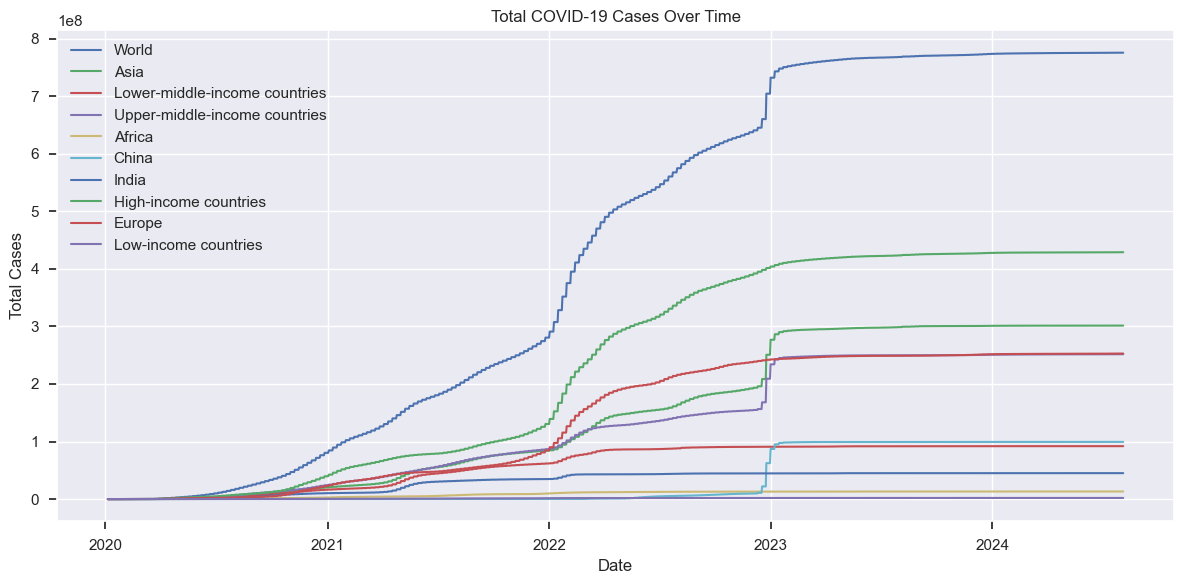

In [9]:
plt.figure(figsize=(12,6))
for country in top_countries:
    country_data = df_top[df_top['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.legend()
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

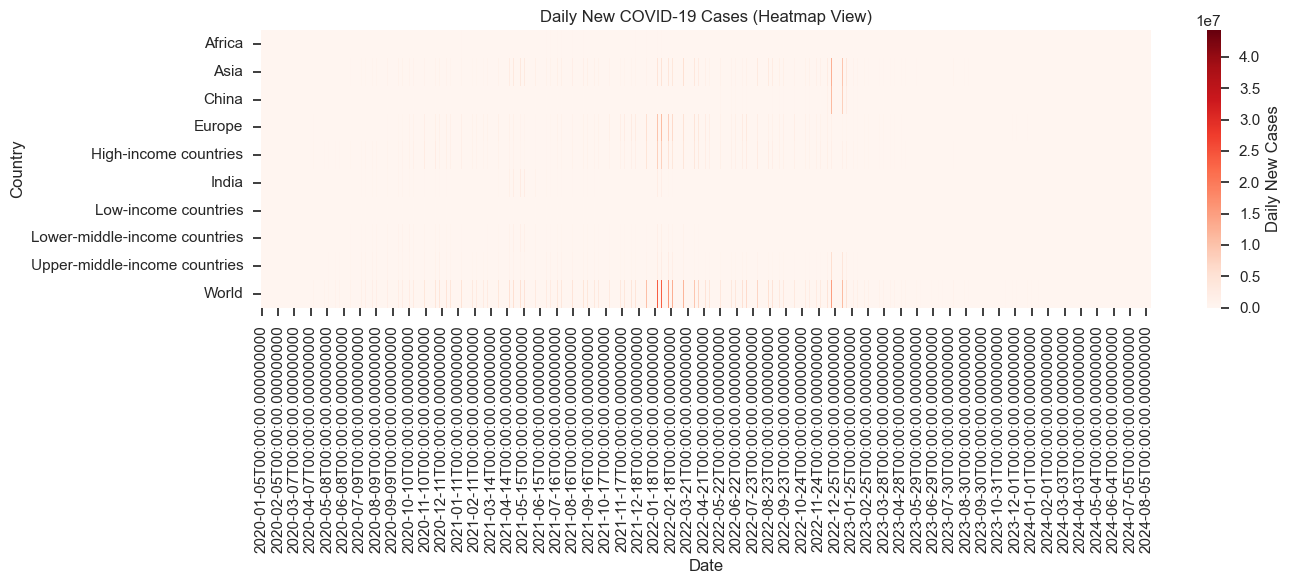

In [11]:
# Pivot table for heatmap
pivot = df_top.pivot_table(values='new_cases', index='location', columns='date', fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='Reds', cbar_kws={'label': 'Daily New Cases'})
plt.title('Daily New COVID-19 Cases (Heatmap View)')
plt.xlabel('Date')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

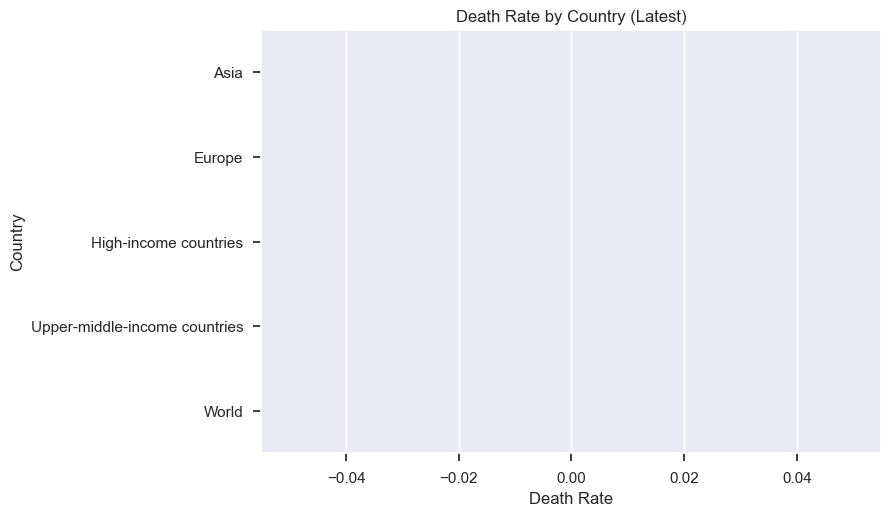

In [15]:
df_top.loc[:, 'death_rate'] = df_top['total_deaths'] / df_top['total_cases']
df_top.loc[:, 'death_rate'] = df_top['death_rate'].fillna(0)


latest = df_top[df_top['date'] == df_top['date'].max()]
latest_death = latest[['location', 'death_rate']].sort_values(by='death_rate', ascending=False)

sns.barplot(data=latest_death, x='death_rate', y='location')
plt.title('Death Rate by Country (Latest)')
plt.xlabel('Death Rate')
plt.ylabel('Country')
plt.show()

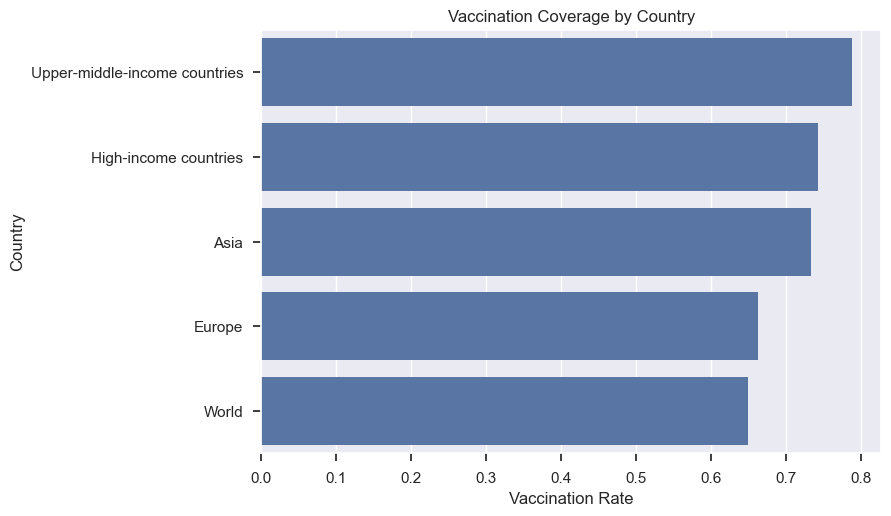

In [19]:
latest.loc[:, 'vaccination_rate'] = latest['people_fully_vaccinated'] / latest['population']
latest.loc[:, 'vaccination_rate'] = latest['vaccination_rate'].fillna(0)


sns.barplot(data=latest.sort_values(by='vaccination_rate', ascending=False),
            x='vaccination_rate', y='location')
plt.title('Vaccination Coverage by Country')
plt.xlabel('Vaccination Rate')
plt.ylabel('Country')
plt.show()

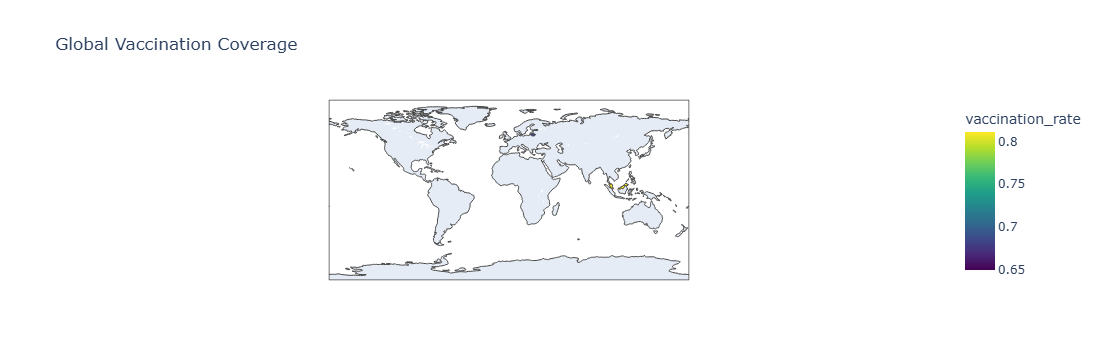

In [23]:
global_latest = df[df['date'] == df['date'].max()].copy()  # <--- added .copy()
global_latest['vaccination_rate'] = global_latest['people_fully_vaccinated'] / global_latest['population']
global_latest = global_latest.dropna(subset=['vaccination_rate'])

fig = px.choropleth(global_latest, locations='location',
                    locationmode='country names',
                    color='vaccination_rate',
                    title='Global Vaccination Coverage',
                    color_continuous_scale='Viridis')
fig.show()

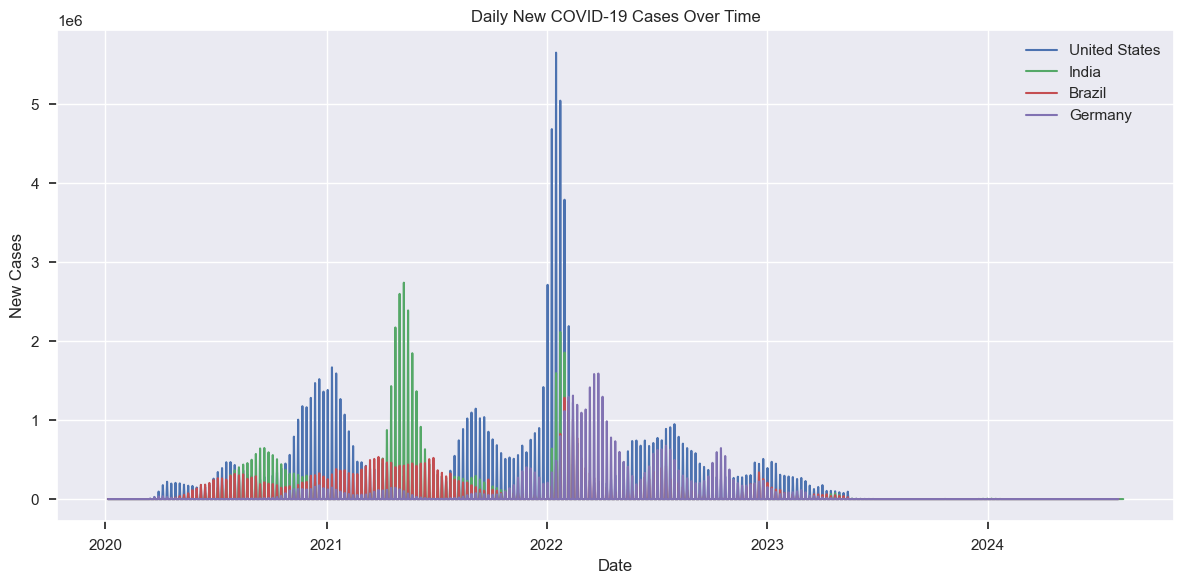

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for selected countries
countries = ['United States', 'India', 'Brazil', 'Germany']
df_filtered = df[df['location'].isin(countries)]

# Plot
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
📊 2. Bar Chart: Average Total Deaths in Selected Countries

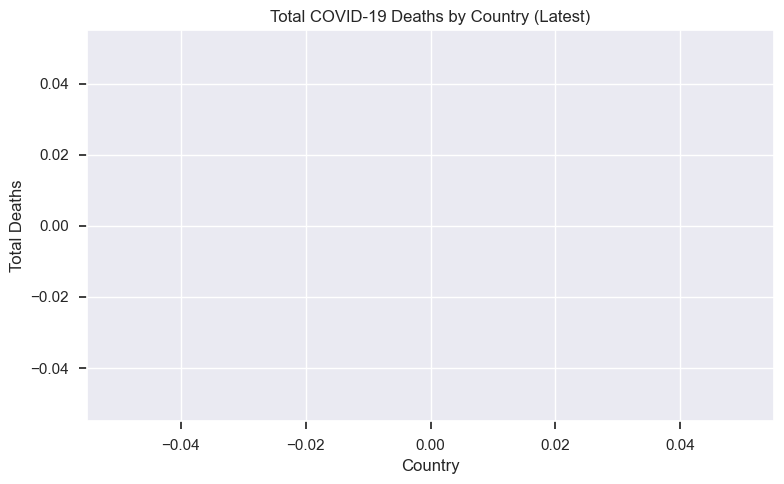

In [36]:
# Get latest data
latest = df[df['date'] == df['date'].max()]
top_countries = ['United States', 'India', 'Brazil', 'Germany']
latest_filtered = latest[latest['location'].isin(top_countries)]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(latest_filtered['location'], latest_filtered['total_deaths'], color='salmon')
plt.title('Total COVID-19 Deaths by Country (Latest)')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()

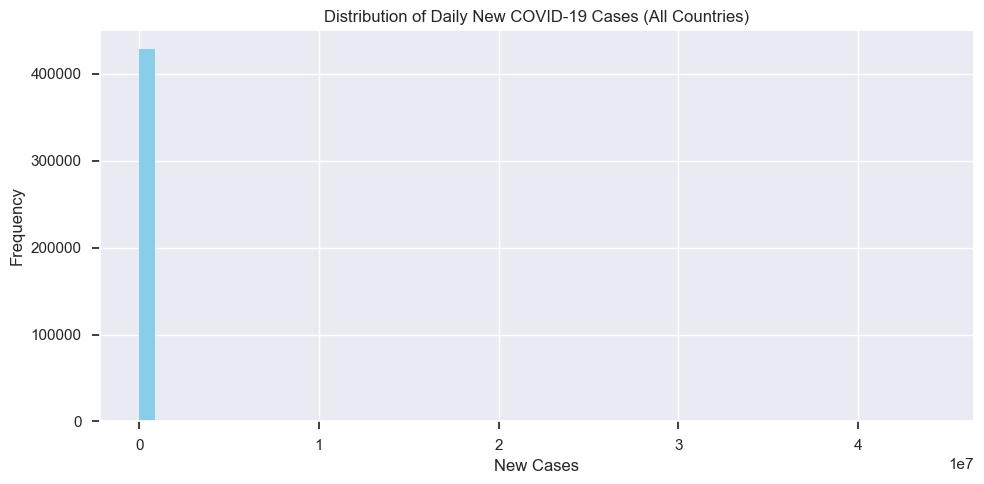

In [39]:
plt.figure(figsize=(10, 5))
df['new_cases'].dropna().hist(bins=50, color='skyblue')
plt.title('Distribution of Daily New COVID-19 Cases (All Countries)')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

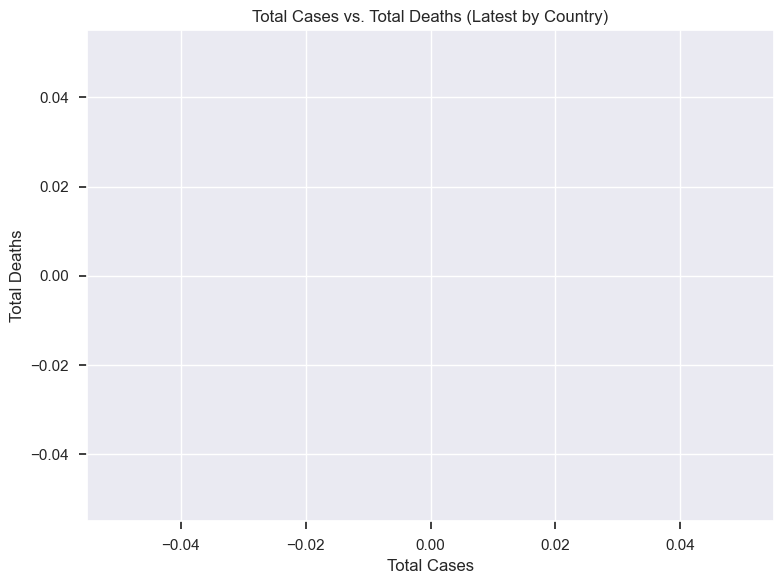

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(latest['total_cases'], latest['total_deaths'], alpha=0.5, color='purple')
plt.title('Total Cases vs. Total Deaths (Latest by Country)')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()